In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
mnist = kr.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
model = kr.models.Sequential([
    kr.layers.Flatten(input_shape=(28, 28)),
    kr.layers.Dense(120, activation='relu'),
    kr.layers.Dropout(0.2),
    kr.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9904 - val_loss: 0.0735 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0.0822 - val_accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.9911 - val_loss: 0.0864 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9918 - val_loss: 0.0899 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9918 - val_loss: 0.0821 - val_accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0833 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0904 - val_accuracy:

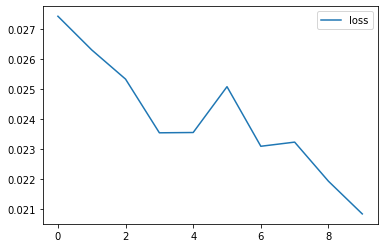

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

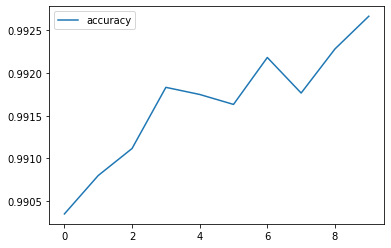

In [35]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend();

In [36]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9802
[0.1018274649977684, 0.9801999926567078]


In [37]:
p_test = np.argmax(model.predict(x_test), axis=-1)

In [40]:
fail_idxs = np.where(np.not_equal(p_test, y_test))[0]
fail_idxs

array([  18,  151,  247,  321,  340,  359,  381,  417,  445,  448,  543,
        582,  691,  720,  947,  951,  956,  965, 1014, 1044, 1112, 1181,
       1194, 1226, 1232, 1247, 1289, 1299, 1319, 1326, 1337, 1393, 1403,
       1494, 1500, 1530, 1549, 1569, 1609, 1681, 1709, 1717, 1790, 1800,
       1901, 1909, 2004, 2016, 2018, 2035, 2040, 2043, 2044, 2053, 2109,
       2118, 2135, 2162, 2182, 2272, 2293, 2343, 2369, 2387, 2414, 2426,
       2488, 2607, 2654, 2720, 2760, 2810, 2863, 2921, 2927, 2939, 2953,
       2995, 3073, 3117, 3130, 3132, 3422, 3475, 3503, 3520, 3549, 3558,
       3567, 3604, 3674, 3681, 3727, 3776, 3808, 3811, 3818, 3838, 3853,
       3869, 3906, 3941, 3943, 3970, 3985, 4027, 4065, 4078, 4093, 4156,
       4163, 4176, 4199, 4224, 4248, 4289, 4294, 4314, 4360, 4369, 4425,
       4497, 4551, 4571, 4575, 4578, 4601, 4731, 4761, 4807, 4823, 4876,
       4880, 4943, 5203, 5246, 5331, 5457, 5634, 5642, 5676, 5734, 5842,
       5887, 5937, 5955, 5973, 5981, 5997, 6023, 61

Text(0.5, 1.0, 'true: 5, pred: 4')

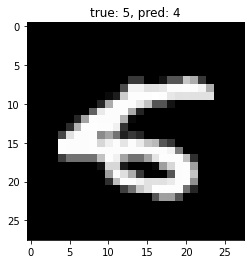

In [65]:
rind = np.random.choice(fail_idxs)
plt.imshow(x_test[rind], cmap='gray')
plt.title("true: %s, pred: %s" % (y_test[rind], p_test[rind]))